<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Pneumonia Detection using X-Ray Images</b></div>

<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
<a id="TOC"></a>
## Table of Content
* [Installing libraries](#khs)
* [Exploratory Data Analysis](#lib)
* [Setting up the directories](#dirs)

<a id="khs"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Installing libraries</b></div> 

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
import os
import numpy as np
import pandas as pd

from PIL import Image
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib.patches as patches
from math import ceil

<a id="dirs"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Setting up the directories</b></div> 

In [66]:
# Put the path to the preprocessed and original data here
path_to_preprocessed_data = ''
path_to_original_data = ''

path_to_preprocessed_images = os.path.join(path_to_preprocessed_data, 'images')
path_to_original_images = os.path.join(path_to_original_data, 'images')

path_to_jpg_data = ""
path_to_labels = os.path.join(path_to_preprocessed_data, 'labels')

In [ ]:
class_info_df = pd.read_csv(os.path.join(path_to_labels, 'stage_2_detailed_class_info.csv'))
train_labels_df =  pd.read_csv(os.path.join(path_to_labels, 'stage_2_train_labels.csv'))
train_labels_merged_df = train_labels_df.merge(class_info_df, on='patientId', how='inner')

<a id="lib"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Exploratory Data Analysis</b></div> 

In [3]:
class_info_df.describe()

,patientId,class
count,30227,30227
unique,26684,3
top,3239951b-6211-4290-b237-3d9ad17176db,No Lung Opacity / Not Normal
freq,4,11821


## Distribution of the classes in the dataset

In [65]:
df_to_plot = class_info_df['class'].value_counts().reset_index()

fig = px.bar(df_to_plot, x='class', y='count', text='class', color='class', title='Distribution of classes in the dataset')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_title='Class', yaxis_title='Count', showlegend=False)
fig.show()

In [40]:
n_patients_without_lung_opacity = train_labels_merged_df.isna().sum().reset_index(name='n_patients').query('n_patients > 0').rename(columns={'index': 'column_name'})
n_patients_without_lung_opacity['percentage'] = np.round(((n_patients_without_lung_opacity['n_patients'] / train_labels_merged_df.shape[0]) * 100), 2)
n_patients_without_lung_opacity = n_patients_without_lung_opacity.style.set_caption("<span style='font-size:15px;font-weight:bold'>Number of patients without lung opacity</span>")
n_patients_without_lung_opacity

,column_name,n_patients,percentage
1,x,20672,54.940000
2,y,20672,54.940000
3,width,20672,54.940000
4,height,20672,54.940000


## Distrutions of the bounding boxes in the dataset

<Figure size 640x480 with 0 Axes>

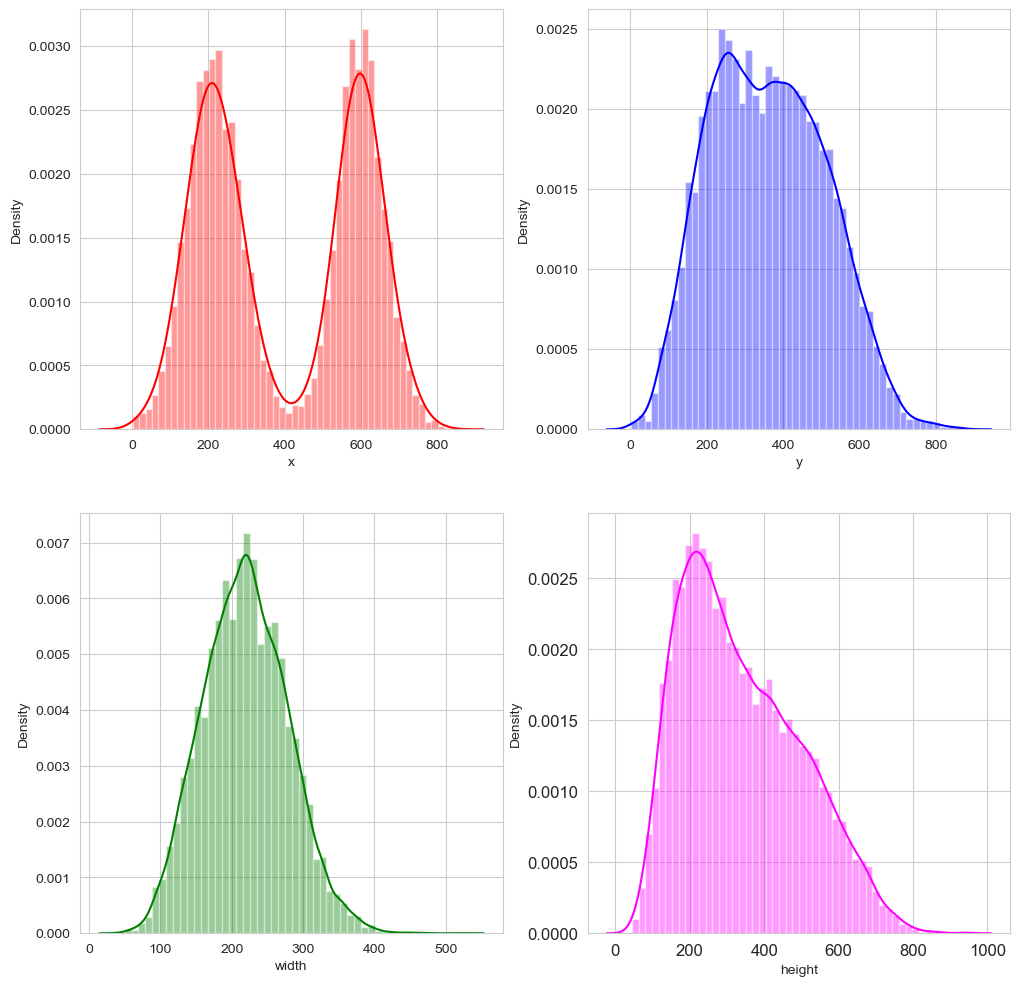

In [47]:
target1 = train_labels_merged_df[train_labels_merged_df['Target']==1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="red", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="magenta", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

## Centers of Lung Opacity rectangles (brown) over rectangles (yellow)

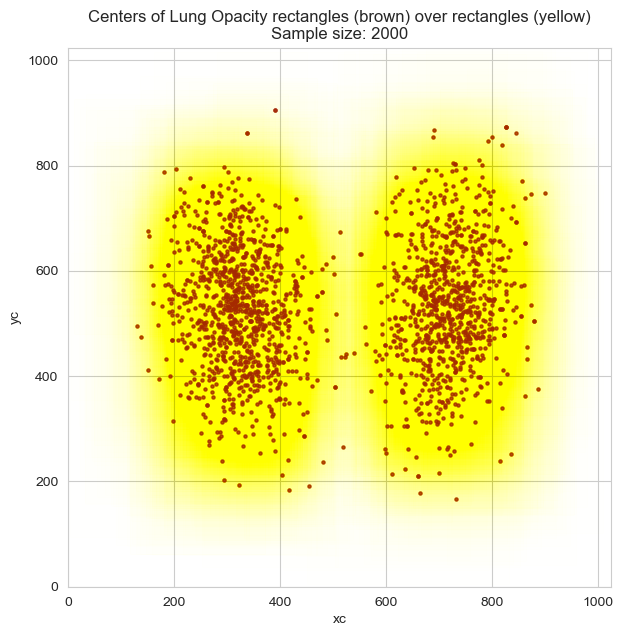

In [50]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title("Centers of Lung Opacity rectangles (brown) over rectangles (yellow)\nSample size: 2000")
target_sample.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color="brown")
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="yellow"))
plt.show()